# Week 14 - Earn-Back Points Assignment #4

These exercises are entirely optional, but they provide good practice. And you can use them to earn extra points toward your semester grade.  Completing all the questions in this assignment correctly will earn you back 8 points.

This is the last earn-back assignment.

**If anything about the above rules is unclear, please message me on Canvas or via email**

## Introduction

When we talk about the "cost of healthcare" in the US, it can be a very confusing topic.  Who's cost are we talking about? Which costs? Are we measuring what is getting charged for care or what is getting paid for care? Or are we talking about what it costs to deliver care? So, whenever you hear some talking about the "cost of healthcare in the US" make sure you scrutinize that statement closesly.

Kaggle had a [dataset on the cost of care](https://www.kaggle.com/datasets/ravichaubey1506/healthcare-cost) that will give us something interesting to look at.  For this earn-back exercise, all the data you need will come from the `/data/HospitalCosts_Kaggle.csv` file.

### E14.01

First, let's load up this data and do some quick profiling.  Use code to show me how many columns there are and what type of data they have.  Then tell me what the range of values are or possible values are in each column.

In [12]:
import pandas as pd
hospital_costs= pd.read_csv("/data/HospitalCosts_Kaggle.csv")

In [13]:
pd.DataFrame(hospital_costs)

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754
...,...,...,...,...,...,...
495,0,1,6,1.0,5881,636
496,0,1,2,1.0,1171,640
497,0,1,2,1.0,1171,640
498,0,1,2,1.0,1086,640


In [14]:
len(hospital_costs.columns)

6

In [15]:
hospital_costs.value_counts()

AGE  FEMALE  LOS  RACE  TOTCHG  APRDRG
0    1       2    1.0   1096    640       6
     0       2    1.0   1280    640       4
     1       2    1.0   1083    640       3
                        1099    640       3
                        1156    640       3
                                         ..
12   0       1    1.0   622     755       1
                        767     755       1
                        7421    249       1
             2    1.0   1310    753       1
0    0       0    5.0   615     254       1
Length: 473, dtype: int64

In [17]:
hospital_costs.columns.unique()

Index(['AGE', 'FEMALE', 'LOS', 'RACE', 'TOTCHG', 'APRDRG'], dtype='object')

In [18]:
hospital_costs['AGE'].value_counts()

0     307
17     38
15     29
16     29
14     25
13     18
12     15
1      10
11      8
10      4
7       3
3       3
9       2
6       2
5       2
4       2
8       2
2       1
Name: AGE, dtype: int64

In [19]:
hospital_costs['FEMALE'].value_counts()

1    256
0    244
Name: FEMALE, dtype: int64

In [20]:
hospital_costs['LOS'].value_counts()

2     224
3      98
1      79
4      38
0      15
5      14
7      11
6       8
18      2
12      2
41      1
8       1
39      1
10      1
15      1
17      1
23      1
24      1
9       1
Name: LOS, dtype: int64

In [21]:
hospital_costs['RACE'].value_counts()

1.0    484
2.0      6
5.0      3
4.0      3
6.0      2
3.0      1
Name: RACE, dtype: int64

In [23]:
hospital_costs['TOTCHG'].value_counts()

1096    8
1156    5
1280    4
622     4
1099    3
       ..
1685    1
2711    1
6810    1
5788    1
2049    1
Name: TOTCHG, Length: 441, dtype: int64

In [24]:
hospital_costs['APRDRG'].value_counts()

640    267
754     37
753     36
758     20
751     14
      ... 
952      1
204      1
710      1
143      1
114      1
Name: APRDRG, Length: 63, dtype: int64

In [26]:
hospital_costs[['AGE','FEMALE', 'LOS', 'RACE', 'TOTCHG', 'APRDRG']].value_counts()

AGE  FEMALE  LOS  RACE  TOTCHG  APRDRG
0    1       2    1.0   1096    640       6
     0       2    1.0   1280    640       4
     1       2    1.0   1083    640       3
                        1099    640       3
                        1156    640       3
                                         ..
12   0       1    1.0   622     755       1
                        767     755       1
                        7421    249       1
             2    1.0   1310    753       1
0    0       0    5.0   615     254       1
Length: 473, dtype: int64

### E14.02 Missing Data?

Are there any columns in this data that are missing data, or is there a value for every column on every row?  Use code to find out if any of the data is missing.  Make sure your code shows how you found any columns with missing data or how you confirmed that none of the columns have any missing data.

In [29]:
import pandas as pd
hospital_costs= pd.read_csv("/data/HospitalCosts_Kaggle.csv")
missing_data= pd.isnull(hospital_costs[['AGE','FEMALE', 'LOS', 'RACE', 'TOTCHG', 'APRDRG']])

In [31]:
missing_data

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
495,False,False,False,False,False,False
496,False,False,False,False,False,False
497,False,False,False,False,False,False
498,False,False,False,False,False,False


In [37]:
missing_data.value_counts()

AGE    FEMALE  LOS    RACE   TOTCHG  APRDRG
False  False   False  False  False   False     499
                      True   False   False       1
dtype: int64

In [41]:
missing_data.sum()

AGE       0
FEMALE    0
LOS       0
RACE      1
TOTCHG    0
APRDRG    0
dtype: int64

### E14.03 What to do?

Hint... yes, there is at least one column with missing data on at least one row.  What do we do about it?  In the cell below, describe what you think would be a good approach for dealing with the fact that some data is missing? Do you fill it in with a default value? Use an average? Delete the row?  What do you think is the best approach?

Response-

I think we can use the .fillna function to assign a null ore negligible response to it because deleting the value from the race row where the missing data appears to be will prove redundant if we want to study the relationship between the parameters. Using an average seems like it is a good solution but it would mean estimation which might not necessarily be the way to approach the missing value since the value might also prove unique or different from the trends/patterns of the rest of the data.

### E14.04 Relationships

Remember using the correlation plot or [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to look at the relationships between columns?

Do that.

Does there appear to be any strong (or even weak) correlation between any of these columns? Write the code here to do a pairplot, review the relationships it shows you, and then describe any meaningful correlations you see.

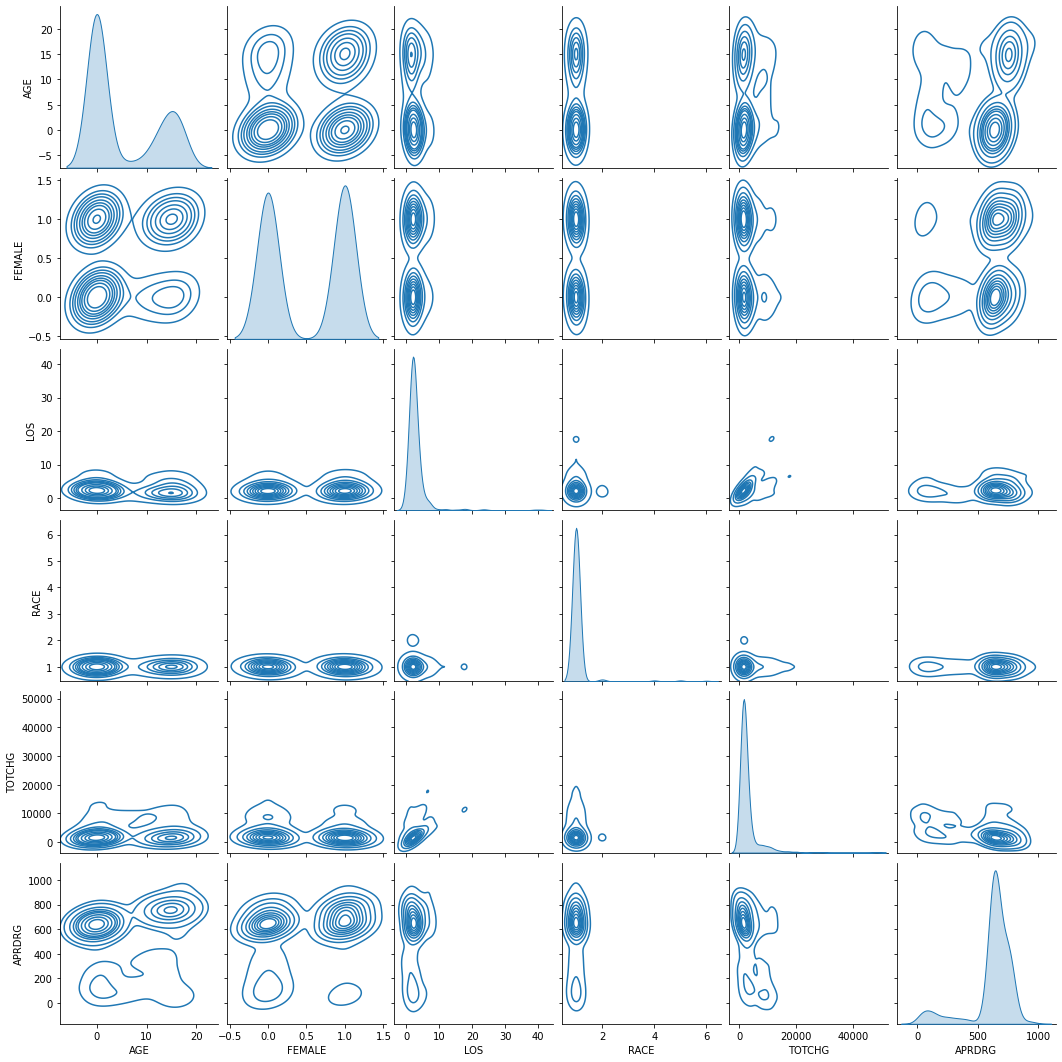

In [51]:
import pandas as pd
hospital_costs= pd.read_csv("/data/HospitalCosts_Kaggle.csv")
import seaborn as sns
sns.pairplot(hospital_costs, kind= "kde")

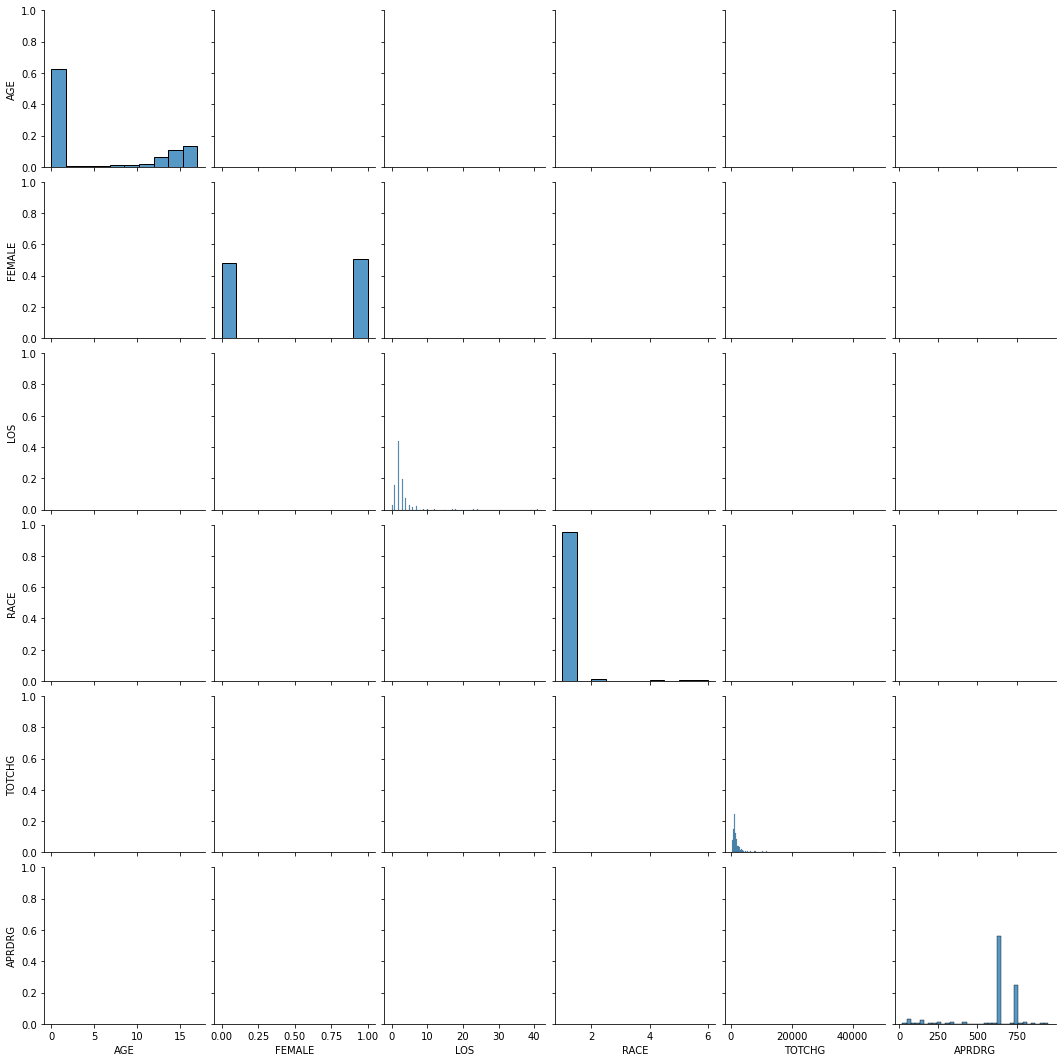

In [52]:
sns.pairplot(hospital_costs, kind= "barplot")

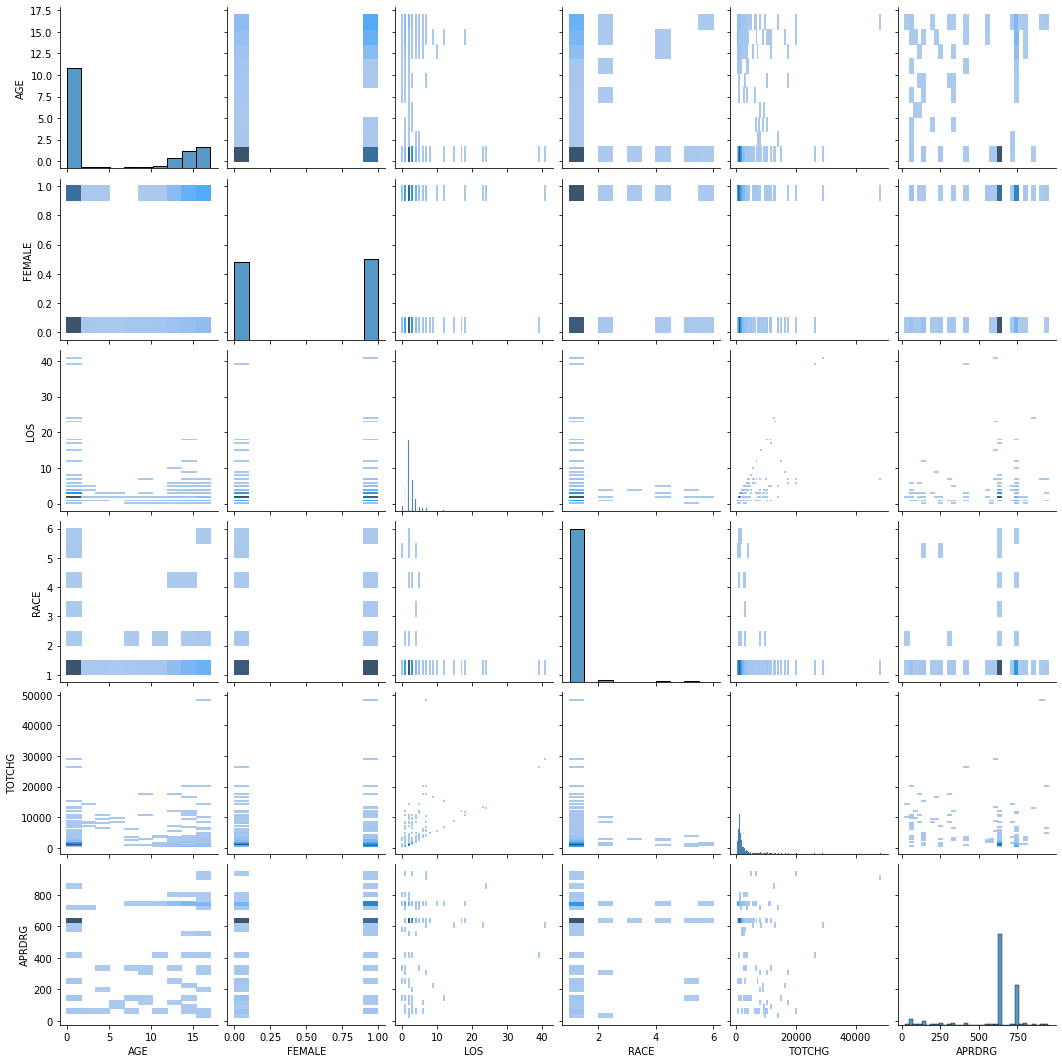

In [64]:
sns.pairplot(hospital_costs, kind= "hist")

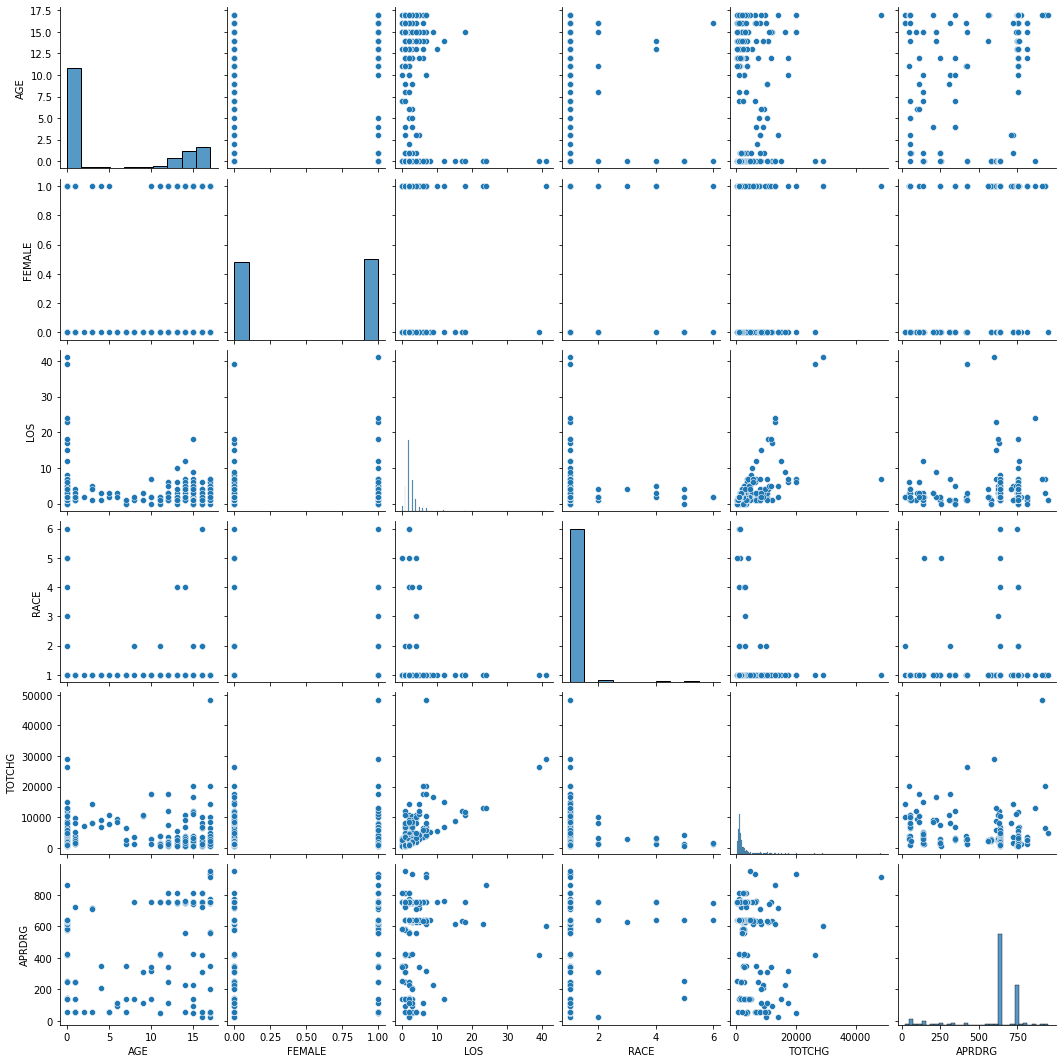

In [65]:
sns.pairplot(hospital_costs)

RESPONSE-
The above pair plots show the correlation between the age, sex, length of stay, hospital discharge costs and All Patient Refined Diagnosis Related Groups. The correlation plots give us an estimate that the number of females(who seem to be the majority of admitted patients according to the binary variables too) who have been discharged are usually very young or around the age of 17 and the majority of them seem to have stayed for a very few days. And more are the patient refined diagnosis related groups, more are the discharge costs for these patients.


### Submit your work as usual